## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [2]:
index = [x for x in range(52)]

In [3]:
# index

## The Datas

In [4]:
data_train = pd.read_csv('./data/trnTEP.csv')

In [5]:
data_train

,-0.044401,-0.65366,0.88521,-0.86136,1.4004,-0.41048,-0.2275,0.96037,0.03002,0.19745,...,-0.90868,-0.0046957,0.79526,-0.068298,-0.24883,1.2117,1.5753.1,-0.023624,-0.0033298,0.090802
0,0.001481,0.97598,0.071957,-0.799930,0.81094,1.79790,0.000494,-0.67535,0.56609,-0.170460,...,-0.186300,-0.050358,-0.013818,-0.670200,0.116260,-1.347500,-0.75251,-0.009022,0.396250,1.085400
1,0.024947,0.62320,-0.208580,1.512100,0.37962,-0.42406,-0.037504,-1.26790,1.10220,0.001520,...,0.061513,-0.070888,-0.666820,-1.480000,-0.054811,1.754900,-0.20431,0.053153,0.809140,1.485200
2,0.011638,-0.30088,0.642490,0.024754,0.36046,1.43590,0.171490,0.95091,-0.50605,-0.109710,...,-0.695940,-0.057791,0.146480,0.173430,0.055062,-0.105330,-1.10830,0.068226,0.360090,0.908650
3,-0.352620,-1.06890,0.488040,-0.048436,0.63841,0.82043,0.038492,0.65746,-1.04210,0.923860,...,-1.745600,-0.246810,-0.456740,0.613380,0.612070,-1.327700,0.64706,0.058334,-0.277320,-0.774760
4,-0.280120,0.57325,-0.816940,-1.527900,-1.69070,1.12360,-0.094502,0.95848,-0.50605,0.557660,...,-0.586060,-0.319020,1.587500,-0.094888,0.975070,0.035968,1.28360,-0.026921,-0.317280,-0.483770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,-0.551910,-1.04390,-0.460750,-0.426140,-1.08210,1.26840,-2.355400,0.35266,-1.57820,0.687710,...,0.077877,-0.511220,-0.649100,-2.127800,0.185100,-2.730900,1.42580,0.468120,-0.992760,0.637820
495,0.919830,-1.20000,-0.114020,-0.903180,0.31253,-0.76799,-2.279400,-1.25280,0.03002,0.072534,...,-1.402000,1.044800,0.386080,-1.646800,0.447270,-0.276540,0.70311,0.521350,-0.062315,0.872360
496,0.968860,-0.58810,-0.460750,-0.164750,0.52340,0.73897,-1.994400,-1.23570,1.10220,0.038310,...,-1.093400,0.995970,-1.177200,-0.786230,0.480640,-0.157580,-0.49009,0.566570,0.139380,0.055857
497,-0.031092,1.89690,-0.177060,1.079500,-0.88078,1.41780,-1.652400,-1.36070,1.63820,-2.156300,...,1.167300,0.002738,0.424890,-1.620200,-1.755100,1.136800,-1.14910,0.708820,1.813800,-0.934700


In [6]:
# trn_add = data_train.columns.values
# type(data_train.columns.values)

In [7]:
# trn_add = trn_add.tolist()

In [8]:
data_train = data_train.values.tolist()

In [9]:
# giving index name
dt_trn = pd.DataFrame(data_train, columns=index)

In [10]:
# dt_trn = dt_trn.append(pd.DataFrame([trn_add], 
#      columns=index), 
#      ignore_index=True)
# dt_trn.loc[len(dt_trn)] = trn_add

In [11]:
dt_trn

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.001481,0.97598,0.071957,-0.799930,0.81094,1.79790,0.000494,-0.67535,0.56609,-0.170460,...,-0.186300,-0.050358,-0.013818,-0.670200,0.116260,-1.347500,-0.75251,-0.009022,0.396250,1.085400
1,0.024947,0.62320,-0.208580,1.512100,0.37962,-0.42406,-0.037504,-1.26790,1.10220,0.001520,...,0.061513,-0.070888,-0.666820,-1.480000,-0.054811,1.754900,-0.20431,0.053153,0.809140,1.485200
2,0.011638,-0.30088,0.642490,0.024754,0.36046,1.43590,0.171490,0.95091,-0.50605,-0.109710,...,-0.695940,-0.057791,0.146480,0.173430,0.055062,-0.105330,-1.10830,0.068226,0.360090,0.908650
3,-0.352620,-1.06890,0.488040,-0.048436,0.63841,0.82043,0.038492,0.65746,-1.04210,0.923860,...,-1.745600,-0.246810,-0.456740,0.613380,0.612070,-1.327700,0.64706,0.058334,-0.277320,-0.774760
4,-0.280120,0.57325,-0.816940,-1.527900,-1.69070,1.12360,-0.094502,0.95848,-0.50605,0.557660,...,-0.586060,-0.319020,1.587500,-0.094888,0.975070,0.035968,1.28360,-0.026921,-0.317280,-0.483770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,-0.551910,-1.04390,-0.460750,-0.426140,-1.08210,1.26840,-2.355400,0.35266,-1.57820,0.687710,...,0.077877,-0.511220,-0.649100,-2.127800,0.185100,-2.730900,1.42580,0.468120,-0.992760,0.637820
495,0.919830,-1.20000,-0.114020,-0.903180,0.31253,-0.76799,-2.279400,-1.25280,0.03002,0.072534,...,-1.402000,1.044800,0.386080,-1.646800,0.447270,-0.276540,0.70311,0.521350,-0.062315,0.872360
496,0.968860,-0.58810,-0.460750,-0.164750,0.52340,0.73897,-1.994400,-1.23570,1.10220,0.038310,...,-1.093400,0.995970,-1.177200,-0.786230,0.480640,-0.157580,-0.49009,0.566570,0.139380,0.055857
497,-0.031092,1.89690,-0.177060,1.079500,-0.88078,1.41780,-1.652400,-1.36070,1.63820,-2.156300,...,1.167300,0.002738,0.424890,-1.620200,-1.755100,1.136800,-1.14910,0.708820,1.813800,-0.934700


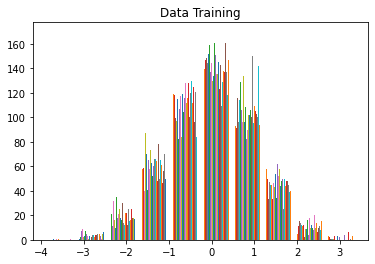

In [12]:
plt.hist(dt_trn)
plt.title('Data Training')
plt.show()

In [13]:
data_test = pd.read_csv('./data/testTEP.csv')

In [14]:
data_test

,-0.031092,-0.19786,0.27054,0.68215,-0.92391,-0.66843,-0.1705,-0.74161,1.1022,-0.049816,...,-0.36397,-0.018147,0.43586,-0.36562,-0.0026564,-1.724,1.0428,-0.0010146,1.4199,-0.11215
0,0.007435,-0.044887,0.65510,0.75403,-1.26420,2.14180,-0.094502,0.112220,-0.50605,-0.030993,...,-0.70295,-0.056375,0.021616,0.028393,-0.022128,0.284720,1.42540,-0.027392,0.17743,-0.13970
1,-0.024087,0.573250,-0.56477,-1.36980,0.30295,-0.25662,-0.075503,0.795670,1.10220,-0.099441,...,0.37712,-0.022040,0.424890,0.144420,0.045326,0.330730,-0.85017,-0.092393,0.37151,-0.13903
2,-0.020234,0.136180,-1.43480,0.20773,0.14001,-0.65485,0.095490,0.780520,0.56609,0.112750,...,1.15090,-0.025934,1.557100,0.086408,-0.164680,-0.641950,-0.14657,-0.024095,-0.18599,-0.29897
3,1.241700,0.919790,-0.28423,2.88700,0.43713,0.91094,-0.208500,-0.446270,-0.50605,0.354030,...,0.31867,1.312800,-3.169100,-0.266510,0.503590,-1.119100,-0.39794,-0.017500,0.37151,0.77626
4,1.215100,0.651300,-0.11402,-1.42070,-0.48780,0.10089,-0.151500,1.446900,0.56609,0.213710,...,0.16671,1.339300,1.341100,-0.815240,0.641980,0.384290,-0.72533,-0.072139,1.34380,0.51283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,17.622000,-0.213470,0.77488,-7.02490,-0.88078,-0.50551,-0.854470,-1.406100,-0.50605,-4.130200,...,-1.53760,17.584000,-3.876100,0.180680,-4.062400,-0.111580,-0.27608,7.748700,-0.29825,-0.84129
955,17.809000,-0.422640,-1.64910,-6.51780,0.70072,0.10089,-0.759470,0.373480,0.56609,-3.729800,...,0.59687,17.808000,-2.447000,0.714900,-3.629100,0.072772,-0.77077,7.831100,1.74150,-1.00260
956,17.795000,-1.187500,-0.32521,-6.79880,0.32691,0.77970,-0.265490,1.191300,0.03002,-3.764800,...,-0.57905,17.822000,-3.617100,1.664900,-3.595100,-0.604820,-1.56650,7.940000,-0.58176,-0.34735
957,18.595000,-0.922150,-0.10771,-5.82390,1.81260,-0.17516,-0.645480,-0.340250,-0.50605,-0.546060,...,0.43322,18.619000,-3.621300,0.552940,-0.218230,-2.625700,-0.74359,7.958300,0.14128,0.91134


In [15]:
# tst_add = data_test.columns.values

In [16]:
# tst_add = trn_add.tolist()

In [17]:
data_test = data_test.values.tolist()

In [18]:
# giving index name
dt_tst = pd.DataFrame(data_test, columns=index)

In [19]:
# dt_trn = dt_trn.append(pd.DataFrame([tst_add], 
#      columns=index), 
#      ignore_index=True)

In [20]:
dt_tst

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.007435,-0.044887,0.65510,0.75403,-1.26420,2.14180,-0.094502,0.112220,-0.50605,-0.030993,...,-0.70295,-0.056375,0.021616,0.028393,-0.022128,0.284720,1.42540,-0.027392,0.17743,-0.13970
1,-0.024087,0.573250,-0.56477,-1.36980,0.30295,-0.25662,-0.075503,0.795670,1.10220,-0.099441,...,0.37712,-0.022040,0.424890,0.144420,0.045326,0.330730,-0.85017,-0.092393,0.37151,-0.13903
2,-0.020234,0.136180,-1.43480,0.20773,0.14001,-0.65485,0.095490,0.780520,0.56609,0.112750,...,1.15090,-0.025934,1.557100,0.086408,-0.164680,-0.641950,-0.14657,-0.024095,-0.18599,-0.29897
3,1.241700,0.919790,-0.28423,2.88700,0.43713,0.91094,-0.208500,-0.446270,-0.50605,0.354030,...,0.31867,1.312800,-3.169100,-0.266510,0.503590,-1.119100,-0.39794,-0.017500,0.37151,0.77626
4,1.215100,0.651300,-0.11402,-1.42070,-0.48780,0.10089,-0.151500,1.446900,0.56609,0.213710,...,0.16671,1.339300,1.341100,-0.815240,0.641980,0.384290,-0.72533,-0.072139,1.34380,0.51283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,17.622000,-0.213470,0.77488,-7.02490,-0.88078,-0.50551,-0.854470,-1.406100,-0.50605,-4.130200,...,-1.53760,17.584000,-3.876100,0.180680,-4.062400,-0.111580,-0.27608,7.748700,-0.29825,-0.84129
955,17.809000,-0.422640,-1.64910,-6.51780,0.70072,0.10089,-0.759470,0.373480,0.56609,-3.729800,...,0.59687,17.808000,-2.447000,0.714900,-3.629100,0.072772,-0.77077,7.831100,1.74150,-1.00260
956,17.795000,-1.187500,-0.32521,-6.79880,0.32691,0.77970,-0.265490,1.191300,0.03002,-3.764800,...,-0.57905,17.822000,-3.617100,1.664900,-3.595100,-0.604820,-1.56650,7.940000,-0.58176,-0.34735
957,18.595000,-0.922150,-0.10771,-5.82390,1.81260,-0.17516,-0.645480,-0.340250,-0.50605,-0.546060,...,0.43322,18.619000,-3.621300,0.552940,-0.218230,-2.625700,-0.74359,7.958300,0.14128,0.91134


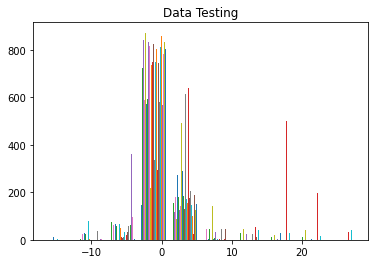

In [21]:
plt.hist(dt_tst)
plt.title('Data Testing')
plt.show()

In [22]:
nComponent = 16 # 30
nSamples = dt_trn.shape[0]
conf_T2 = 0.95 # 0.99 or 0.95

In [89]:
nSamples

499

## Training Centraling kernel

In [23]:
# training proccess
A = dt_trn
# K = np.matmul(A, A.T)
K = A@A.T

In [24]:
K = round(K, 4)

In [25]:
K = pd.DataFrame(K)
K.head()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,30.3157,6.7593,9.4022,2.8874,-1.0508,-1.8192,-9.8680,-7.0790,-4.0571,8.7214,...,1.0389,3.3257,-5.3974,-2.9944,16.2680,12.2792,6.4913,5.8976,3.2291,14.7472
1,6.7593,33.8347,11.5269,-10.5803,-7.1302,-8.2198,3.9064,5.7047,-2.2975,-5.1090,...,-4.4670,10.6830,13.3147,8.9850,8.1892,-1.3852,9.0268,7.9722,22.0390,22.8412
2,9.4022,11.5269,20.5985,2.6422,-3.9246,-1.5844,-4.4500,2.2050,-3.6600,-0.9182,...,-1.0761,2.8649,-0.6233,1.4194,11.6560,3.4265,-0.2666,1.2341,10.2894,17.8517
3,2.8874,-10.5803,2.6422,26.1860,13.6265,-4.0748,-10.4450,1.1644,10.1788,2.1590,...,2.3675,-9.9786,-14.1907,-5.4896,-3.6493,1.3105,-4.8326,-5.9962,-15.7019,-12.4275
4,-1.0508,-7.1302,-3.9246,13.6265,34.7271,0.6218,2.3652,3.8051,2.3183,1.2114,...,5.6185,-2.2179,-2.5304,-3.0188,-4.1810,6.8155,-0.3515,-4.4862,-11.8293,-14.5652


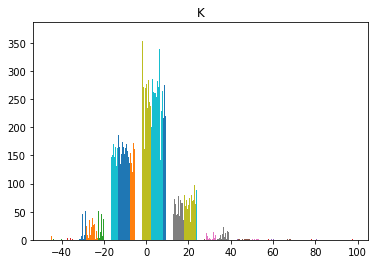

In [26]:
plt.hist(K)
plt.title('K')
plt.show()

In [27]:
s = (nSamples, nSamples)
unit = np.ones(s)/nSamples

In [28]:
#######
unit = pd.DataFrame(unit)

In [29]:
unit = round(unit, 4)

In [30]:
unit.head()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [31]:
K_c = K-unit@K-K@unit+unit@K@unit

In [32]:
K_c = round(K_c, 4)

In [33]:
K_c.head()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,30.2912,6.7499,9.3875,2.8795,-1.0562,-1.8381,-9.8639,-7.0922,-4.0624,8.6996,...,1.0298,3.3155,-5.4124,-2.9783,16.2491,12.2603,6.4922,5.8827,3.2077,14.7285
1,6.7499,33.8403,11.5273,-10.5731,-7.1205,-8.2237,3.9256,5.7065,-2.2878,-5.1157,...,-4.4611,10.6879,13.3148,9.0161,8.1854,-1.3890,9.0428,7.9723,22.0326,22.8375
2,9.3875,11.5273,20.5936,2.6441,-3.9202,-1.5935,-4.4361,2.2015,-3.6555,-0.9302,...,-1.0754,2.8645,-0.6285,1.4453,11.6469,3.4174,-0.2559,1.2290,10.2778,17.8428
3,2.8795,-10.5731,2.6441,26.1947,13.6377,-4.0771,-10.4243,1.1677,10.1901,2.1538,...,2.3750,-9.9722,-14.1891,-5.4569,-3.6516,1.3082,-4.8151,-5.9945,-15.7067,-12.4296
4,-1.0562,-7.1205,-3.9202,13.6377,34.7408,0.6219,2.3884,3.8109,2.3320,1.2087,...,5.6284,-2.2090,-2.5263,-2.9837,-4.1808,6.8157,-0.3315,-4.4821,-11.8317,-14.5649


In [34]:
# Compute Eigenvalues and Eigenvector
# eigvls, eigvct = np.linalg.eig(K_c) # K_c
u, s, vh = np.linalg.svd(K_c/nSamples)

In [35]:
# LAMBDA
lambda_ = s
lambd = lambda_

In [36]:
# COEFFICIENT
cf = np.sqrt(nSamples*lambd)
coefficient = np.divide(u, cf.T) # u
# coefficient = np.divide(vh, cf.T) # vh

In [37]:
# eigvls = eigvls.real
eigvls = lambd

In [38]:
# eigvct = eigvct.real
eigvct = coefficient

In [39]:
eigvct = pd.DataFrame(eigvct)

In [40]:
eigvct.head()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,-0.000090,-0.000102,0.001836,-0.000063,0.000522,-0.002290,0.000404,-0.000229,0.001445,-0.000950,...,-0.353369,13.174586,-7.409648,-2.808753,8.360023,-12.610096,-18.276177,-10.014762,1.742201,10.591114
1,-0.000427,0.000272,0.001072,0.001927,-0.001850,0.000762,0.000354,-0.000024,0.002558,-0.002287,...,-6.045234,-5.187584,21.005247,5.605180,3.601104,-8.847580,-28.180245,19.182005,15.775265,-19.897109
2,-0.000161,-0.000032,0.001208,0.000144,-0.000834,-0.000684,0.001152,-0.000029,0.000035,-0.001775,...,-15.391309,10.877358,-0.321996,45.278872,20.027166,15.676437,20.046267,10.429094,2.394688,-18.086958
3,0.000079,-0.000492,-0.000616,-0.001347,0.000959,-0.000799,-0.000243,0.000090,0.000838,-0.000784,...,-1.573478,-9.028761,-3.025411,8.738711,-7.325108,13.319505,8.363003,-5.282127,-23.636574,35.712240
4,-0.000103,-0.000051,-0.001272,-0.000409,0.000028,0.000333,-0.000713,0.000971,-0.001119,-0.000567,...,9.939450,-4.880872,-16.062713,24.959653,-0.589781,0.951632,-9.802541,-2.486011,-10.093081,14.118560


In [41]:
eigvls = pd.DataFrame(eigvls)

In [42]:
eigvls = round(eigvls, 4)

In [43]:
eigvls.head()

,0
0,6.6071
1,3.9330
2,2.8067
3,2.3307
4,2.1936


In [44]:
 eigvct.iloc[:,:nComponent]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.000090,-0.000102,0.001836,-0.000063,0.000522,-0.002290,0.000404,-0.000229,0.001445,-0.000950,0.001084,-0.001833,0.000722,-0.002151,0.001222,-0.002456
1,-0.000427,0.000272,0.001072,0.001927,-0.001850,0.000762,0.000354,-0.000024,0.002558,-0.002287,0.000102,0.000926,-0.001076,-0.000778,0.000239,-0.000203
2,-0.000161,-0.000032,0.001208,0.000144,-0.000834,-0.000684,0.001152,-0.000029,0.000035,-0.001775,-0.000362,-0.000678,0.001059,-0.001648,0.000335,0.000519
3,0.000079,-0.000492,-0.000616,-0.001347,0.000959,-0.000799,-0.000243,0.000090,0.000838,-0.000784,-0.001176,-0.001544,0.001323,-0.001420,-0.001863,-0.001693
4,-0.000103,-0.000051,-0.001272,-0.000409,0.000028,0.000333,-0.000713,0.000971,-0.001119,-0.000567,-0.000438,-0.001314,-0.000062,-0.003103,-0.000173,-0.004537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,-0.001989,0.000893,-0.001164,-0.001481,0.000949,-0.003178,-0.001621,-0.002743,-0.000177,0.000579,0.000446,-0.000590,-0.001274,-0.000945,0.003272,-0.000619
495,-0.001557,0.000457,0.000113,-0.000194,-0.001387,-0.000770,-0.000946,-0.001321,0.000716,0.001786,0.003693,0.003174,-0.000344,-0.000228,0.000472,-0.003521
496,-0.001349,0.000257,0.000736,-0.000271,-0.000799,-0.000165,0.000520,-0.001534,0.000911,0.001678,0.001259,0.004381,-0.000301,0.000686,0.000068,-0.002461
497,-0.001084,0.000388,0.002899,0.001599,0.000502,0.003016,0.001612,-0.003208,0.000008,-0.000881,-0.001030,-0.000077,-0.002061,0.002787,0.002193,-0.000472


In [45]:
# score matrix
# score_train = np.matmul(K_c, eigvct.iloc[:,:nComponent])
score_train = K_c@eigvct.iloc[:,:nComponent]

In [46]:
score_train = round(score_train, 4)

In [47]:
score_train = pd.DataFrame(score_train)

In [48]:
score_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.2980,-0.2000,2.5714,-0.0727,0.5711,-2.3773,0.3893,-0.1978,1.1725,-0.7122,0.7576,-1.1741,0.4520,-1.3163,0.7273,-1.3745
1,-1.4081,0.5332,1.5009,2.2414,-2.0253,0.7910,0.3414,-0.0209,2.0758,-1.7144,0.0715,0.5934,-0.6739,-0.4759,0.1420,-0.1136
2,-0.5307,-0.0636,1.6923,0.1676,-0.9126,-0.7104,1.1101,-0.0251,0.0280,-1.3306,-0.2528,-0.4345,0.6631,-1.0086,0.1996,0.2904
3,0.2593,-0.9656,-0.8621,-1.5670,1.0499,-0.8290,-0.2338,0.0775,0.6802,-0.5876,-0.8219,-0.9888,0.8283,-0.8692,-1.1086,-0.9473
4,-0.3406,-0.1010,-1.7813,-0.4756,0.0304,0.3457,-0.6867,0.8402,-0.9077,-0.4247,-0.3063,-0.8417,-0.0386,-1.8991,-0.1032,-2.5390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,-6.5581,1.7516,-1.6299,-1.7224,1.0384,-3.2982,-1.5611,-2.3732,-0.1437,0.4343,0.3115,-0.3777,-0.7978,-0.5786,1.9468,-0.3462
495,-5.1320,0.8974,0.1578,-0.2251,-1.5183,-0.7996,-0.9114,-1.1427,0.5811,1.3386,2.5807,2.0334,-0.2153,-0.1398,0.2811,-1.9707
496,-4.4478,0.5040,1.0309,-0.3151,-0.8742,-0.1710,0.5008,-1.3275,0.7395,1.2578,0.8802,2.8065,-0.1885,0.4198,0.0405,-1.3774
497,-3.5743,0.7618,4.0603,1.8595,0.5491,3.1305,1.5532,-2.7751,0.0066,-0.6604,-0.7199,-0.0492,-1.2902,1.7055,1.3048,-0.2640


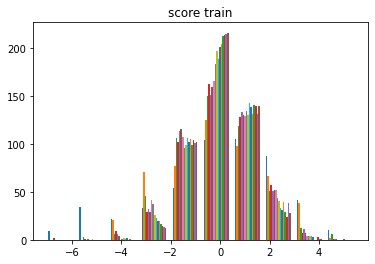

In [49]:
plt.hist(score_train)
plt.title('score train')
plt.show()

In [50]:
### T2 training Process
a = eigvls.iloc[:nComponent,:]
# b = np.zeros((nComponent, nComponent), int)
# np.fill_diagonal(b, a)
# fill the diagonal not in real number
# good if the number is double format !!!!!!!!!!!!!!!!!!!!!!

In [51]:
z = a.values.tolist()

In [52]:
extract_egv=[]
for i in range(len(z)):
    extract_egv.append(z[i][0])
#     print(z[i][0])


In [53]:
c = np.diag(extract_egv)

In [54]:
c

array([[6.6071, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 3.933 , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 2.8067, 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 2.3307, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 2.1936, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 2.08  , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.9305, 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.

In [55]:
invegvldiag = c

In [56]:
invegvldiag = pd.DataFrame(invegvldiag)

In [57]:
invegvldiag

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6.6071,0.000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,3.933,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.000,2.8067,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.000,0.0000,2.3307,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.000,0.0000,0.0000,2.1936,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.000,0.0000,0.0000,0.0000,2.08,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.000,0.0000,0.0000,0.0000,0.00,1.9305,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000,1.7337,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,1.6261,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,1.5023,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [58]:
T2_train = score_train@invegvldiag@score_train.T

In [59]:
T2_train.head()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,42.847343,12.278515,20.085842,4.420395,-7.965200,-5.541653,-21.275305,-10.318930,-5.281598,11.683997,...,11.462766,10.788213,7.756660,-1.974101,35.010366,20.178133,15.068803,14.578452,20.837190,35.550899
1,12.278515,55.542640,19.616666,-19.726423,-8.275644,-16.147409,8.100082,12.998642,-6.864951,-10.924078,...,42.706470,75.495366,66.890806,62.188327,62.624950,37.365446,54.870105,50.693448,67.468166,68.725728
2,20.085842,19.616666,20.171248,-3.515818,-6.655831,-3.314784,-9.411802,2.779367,-7.743070,2.309818,...,21.240252,31.564315,21.688894,14.036470,34.535030,13.323382,15.471029,17.904129,28.722933,38.115327
3,4.420395,-19.726423,-3.515818,23.615025,11.353963,3.299450,-10.498756,3.854758,17.107594,11.970087,...,-13.694102,-33.749248,-23.143536,-21.024948,-17.025335,-2.028001,-18.063498,-17.102156,-33.961297,-28.947154
4,-7.965200,-8.275644,-6.655831,11.353963,26.943411,5.031550,11.394374,13.313045,9.513237,1.784522,...,15.625103,2.132610,17.776069,17.483340,9.688873,22.772657,10.417559,-0.130101,-20.978782,-26.794348


In [60]:
# here the data is from training data 
# or with using same data
T2_tfinal = np.diag(T2_train)

In [61]:
T2_tfinal

array([ 42.84734296,  55.54264019,  20.17124777,  23.6150249 ,
        26.94341138,  20.69648016,  53.52348028,  25.88518478,
        32.8344132 ,  29.71548765,  59.98828156,  20.94951999,
        80.35594768,  40.90026422,  35.16142778,  20.27221012,
        35.05169085,  55.54551198,  34.90529408,  23.78975673,
        35.12046817,  18.8606867 ,  35.16572001,  71.5292446 ,
        57.38706417,  29.52068816,  25.47039986,  37.01672415,
        19.16658365,  16.71731721,  25.01341586,  45.95628891,
        74.83973014,  59.05477679,  80.46951317,  26.80389889,
        70.74652935,  96.08823513,  86.49708259,  65.92511147,
        57.98315081,  61.81076227,  53.76971016,  43.93979962,
        32.64912624,  45.69581611,  70.01590392,  84.97526554,
       134.20858196, 140.04477631, 154.61088604, 257.04730178,
       191.1629084 , 187.90562546, 119.20142014, 184.47288604,
       134.02792288, 256.86189247, 236.20115937, 270.72042285,
       259.35500901, 230.20424891, 205.05228036, 186.50

In [62]:
from scipy.stats import f
F = f.ppf(conf_T2, nComponent, nSamples-nComponent)
T2_trlim = ((nComponent*(nSamples**2-1))/(nSamples*(nSamples-nComponent)))*F

In [63]:
T2_trlim
# conf_T2 = 0.95, T2_trlim = 47.3464294521146
# conf_T2 = 0.99, T2_trlim = 55.46204002064628

27.51374258307947

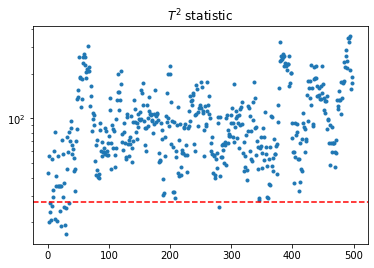

In [64]:
# plotting the result
plt.semilogy(T2_tfinal,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()
# in this scatter plot the data has been use is
# training data it self 

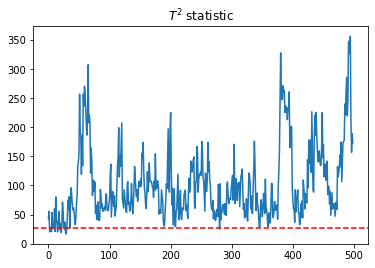

In [65]:
plt.plot(T2_tfinal)
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

In [66]:
print(f'T2: {(T2_tfinal>T2_trlim).sum()/T2_tfinal.shape[0]}')
# ofcourse 100% because we using train and test in the same dataset

T2: 0.969939879759519


## Testing Centraling kernel

In [67]:
# Kt = np.matmul(dt_tst, dt_trn.T)
Kt = dt_tst@ dt_trn.T

In [68]:
Kt.shape

(959, 499)

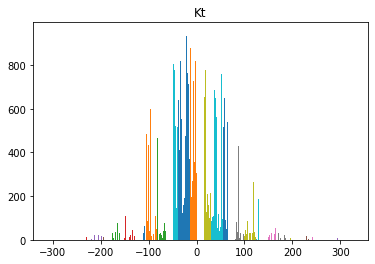

In [69]:
plt.hist(Kt)
plt.title('Kt')
plt.show()

In [70]:
# centralize the kernel
st = (len(dt_tst),len(dt_trn)) # 2000 or 960
unit_t = np.ones(st)/len(dt_trn)

In [71]:
#######
unit_t = pd.DataFrame(unit_t)

In [72]:
unit_t = round(unit_t, 4)

In [73]:
unit_t

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
955,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
956,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
957,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [74]:
Kt_c = Kt-unit_t@K-Kt@unit+unit_t@K@unit
# the result are NaN

In [75]:
Kt_c = round(Kt_c, 4)

In [76]:
Kt_c

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
0,-2.0760,-1.7804,0.1685,3.9982,8.4461,-2.6907,4.6268,7.0977,0.0545,-1.7207,...,3.5507,2.8630,2.1981,4.7975,-2.0208,7.9313,0.1833,-0.0668,0.3728,-1.9236
1,9.9388,2.3658,1.1310,-2.4465,1.2950,1.3023,-6.4503,-5.9453,-1.1060,0.9786,...,3.2872,6.6333,-2.2045,8.8687,10.9011,2.5221,0.8585,0.9884,5.7804,7.0112
2,2.4968,-4.6160,-2.8106,-0.7844,3.6524,4.5440,-2.1628,-7.3682,-2.9962,3.4501,...,2.7274,-1.0350,2.4871,-1.3040,3.6208,9.1550,-3.7888,-4.6222,-0.1367,5.3494
3,0.6468,3.9186,1.5141,1.9652,-10.1073,-2.5072,3.0508,10.9037,7.0430,-5.9392,...,-6.4639,-0.2921,-1.5230,-21.0809,-11.4560,-2.0677,-1.4810,7.2545,-4.0051,1.0374
4,-0.3315,-0.2270,3.8679,-4.1006,3.1947,3.6469,6.6014,3.0383,-1.2480,-6.8483,...,-5.3033,4.8799,-3.8558,-4.2328,-8.8566,-16.3375,-0.0252,-1.1132,0.9036,0.4413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,-2.1111,-12.6711,-0.5033,-10.4550,-11.4870,-2.0688,-10.1818,-9.0673,7.9335,-21.6990,...,47.8125,42.3693,44.6242,67.2153,7.1688,7.7099,66.4708,70.5379,31.6942,35.7795
955,7.1200,-9.2297,0.0954,-12.1250,-8.4268,1.1560,-9.2787,-15.8429,11.0379,-20.0861,...,41.0637,47.4683,35.6260,63.1867,6.5994,5.7734,49.6913,56.3540,31.5553,38.5905
956,18.6286,-12.2670,8.3781,-3.9343,-9.7374,4.1559,-20.7493,-16.4655,8.0232,-15.9848,...,44.0006,34.7533,25.3357,60.4073,15.4217,9.3229,48.8157,54.8273,17.5182,39.3684
957,17.9666,-9.9489,8.4073,2.2666,-9.7163,7.0759,-3.2336,-16.5682,10.6307,-17.1484,...,45.8759,39.7562,40.8970,47.9433,11.7064,19.8127,64.8780,67.3171,4.1716,28.8941


In [77]:
# score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])
score_test = Kt_c@eigvct.iloc[:,:nComponent]

In [78]:
score_test = round(score_test, 4)

In [79]:
score_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.1822,0.1482,-0.6784,0.0075,0.1864,1.0210,-1.6551,-0.0980,-0.3960,-0.2064,-1.2734,-0.0708,-0.2431,-0.8107,0.3550,-1.0908
1,-0.5919,0.2157,1.1836,0.0047,0.6856,-0.2008,1.5341,0.9791,0.5785,0.0463,1.5552,-1.4858,-1.4334,-0.2889,0.1029,0.7386
2,-0.2879,-0.0201,0.3961,-0.4005,1.1008,-0.6877,0.1932,0.1432,-0.1759,0.4565,0.7571,-1.0727,-1.6950,-0.1487,0.2667,0.8588
3,0.5362,-0.1302,0.9206,-0.2736,-0.2460,-1.4609,-1.1528,-0.6404,0.2883,-0.3766,-3.2866,2.5050,1.2824,-0.0077,-0.9951,1.0046
4,0.6649,-0.2444,2.0693,1.0815,-0.8142,0.0664,-0.4385,1.5232,-1.3903,0.6814,0.1415,0.1041,1.5236,-0.8885,-0.0265,0.2255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,-6.3332,-1.9883,14.2500,-14.6869,-8.5006,8.2543,-6.6027,0.3267,-6.9134,4.2950,-1.2018,1.3098,4.7055,0.5999,0.4123,3.0202
955,-6.1915,-2.8782,14.6611,-15.0237,-7.5219,8.0933,-5.1001,2.1491,-6.0141,3.4187,0.5127,-0.3742,3.8747,0.8852,-0.4075,5.0560
956,-5.6306,-2.9810,14.9220,-16.4993,-7.8765,6.2571,-4.1876,2.1909,-5.6446,2.8957,0.3955,-1.2457,4.6612,-0.4899,-0.1323,5.0677
957,-7.1862,-4.2383,14.2794,-16.1285,-8.6213,3.0341,-7.2922,3.0331,-6.1106,3.2156,-0.6540,1.9659,5.1590,0.3186,-1.1147,4.5725


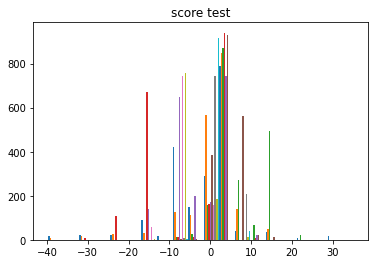

In [80]:
plt.hist(score_test)
plt.title('score test')
plt.show()

In [81]:
T2_test = score_test@invegvldiag@score_test.T
T2_test_final = np.diag(T2_test)

In [82]:
T2_test = round(T2_test, 4)

In [83]:
T2_test

,0,1,2,3,4,5,6,7,8,9,...,949,950,951,952,953,954,955,956,957,958
0,14.1085,-9.7906,-3.6323,1.6417,-3.3599,-1.4243,-8.5165,8.4382,-11.3715,-7.4447,...,9.0661,-2.9718,9.6415,11.1122,-2.9361,13.7630,1.1527,-5.6302,0.3822,18.2540
1,-9.7906,23.8235,12.5847,-16.6983,0.7208,3.4711,13.1473,14.3419,24.3228,0.5216,...,21.4776,26.7729,25.4499,23.2581,31.1461,17.5838,37.4296,39.8408,24.6481,18.8536
2,-3.6323,12.5847,12.2998,-8.1739,-3.7984,5.4922,2.3331,8.1847,8.2233,3.8419,...,-3.8850,-0.6315,5.1322,10.3283,5.9303,1.8097,12.6819,14.7000,11.3828,4.3448
3,1.6417,-16.6983,-8.1739,40.2761,8.0515,-5.8768,-3.9512,-12.2190,8.7597,-7.7513,...,31.2026,43.3471,36.9238,39.5578,37.9852,33.1548,19.5202,26.0400,51.6057,29.3667
4,-3.3599,0.7208,-3.7984,8.0515,31.5783,-5.4119,5.4167,16.3629,36.6800,-1.3398,...,80.0396,81.3275,74.2466,62.4028,86.3553,71.6604,72.2736,73.8356,72.7286,58.8197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,13.7630,17.5838,1.8097,33.1548,71.6604,-97.0986,-70.8824,169.6598,187.4680,-0.0903,...,1794.4401,1831.1599,1653.4929,1696.4048,1843.7377,1886.1194,1856.3019,1853.0701,1904.0462,1893.4965
955,1.1527,37.4296,12.6819,19.5202,72.2736,-90.2132,-61.1127,179.2257,198.7941,-10.5129,...,1780.2068,1820.9987,1645.5318,1686.5565,1835.3577,1856.3019,1859.3834,1862.4167,1897.4681,1885.7602
956,-5.6302,39.8408,14.7000,26.0400,73.8356,-86.5855,-56.2773,173.5762,204.0660,1.8360,...,1779.7665,1836.0037,1628.9424,1686.9678,1841.8157,1853.0701,1862.4167,1886.5480,1916.9249,1885.0892
957,0.3822,24.6481,11.3828,51.6057,72.7286,-88.7630,-75.8529,168.1971,198.4126,14.6196,...,1842.5881,1897.7575,1698.4834,1773.3656,1895.8007,1904.0462,1897.4681,1916.9249,2031.4756,1966.7261


In [84]:
T2_test_final = np.diag(T2_test)

In [85]:
T2_test_final

array([1.41085000e+01, 2.38235000e+01, 1.22998000e+01, 4.02761000e+01,
       3.15783000e+01, 1.80086000e+01, 2.98903000e+01, 7.11801000e+01,
       9.05746000e+01, 6.22242000e+01, 4.56134000e+01, 3.11138000e+01,
       2.61103000e+01, 3.25202000e+01, 3.14710000e+01, 2.90196000e+01,
       2.08079000e+01, 3.99869000e+01, 5.65836000e+01, 6.89423000e+01,
       1.62043900e+02, 6.04536000e+01, 7.32041000e+01, 5.06254000e+01,
       5.05068000e+01, 9.89400000e+01, 1.14380500e+02, 9.28218000e+01,
       7.89645000e+01, 5.39506000e+01, 4.98043000e+01, 1.26555300e+02,
       5.57155000e+01, 4.52912000e+01, 7.12481000e+01, 8.07804000e+01,
       5.35467000e+01, 6.46644000e+01, 6.90146000e+01, 4.40616000e+01,
       4.63382000e+01, 9.24127000e+01, 9.99395000e+01, 1.28484000e+02,
       1.47346100e+02, 1.04646700e+02, 1.18078900e+02, 1.12615400e+02,
       1.40590200e+02, 1.83470400e+02, 1.81925900e+02, 2.34428800e+02,
       1.72724300e+02, 2.65037400e+02, 2.16404600e+02, 1.19572000e+02,
      

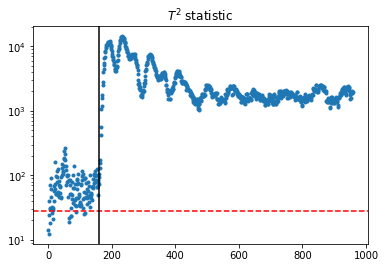

In [86]:
plt.figure(figsize=(6,4))
plt.semilogy(T2_test_final,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.axvline(160, c='k')
plt.title('$T^2$ statistic')
plt.show()

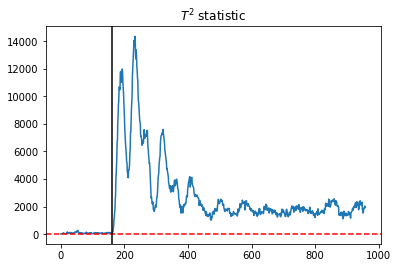

In [87]:
plt.figure(figsize=(6,4))
plt.plot(T2_test_final)
plt.axhline(T2_trlim, ls='--',c='r')
plt.axvline(160, c='k')
plt.title('$T^2$ statistic')
plt.show()

In [88]:
print(f'T2: {(T2_test_final>T2_trlim).sum()/T2_test_final.shape[0]}')

T2: 0.986444212721585
